In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv('train.csv')


In [6]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
data.shape

(1460, 81)

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Number of nulls in each column

In [9]:
for col in data.columns:
    print(f'{col} : {data[col].isna().sum()} out of {data.shape[0]}')

Id : 0 out of 1460
MSSubClass : 0 out of 1460
MSZoning : 0 out of 1460
LotFrontage : 259 out of 1460
LotArea : 0 out of 1460
Street : 0 out of 1460
Alley : 1369 out of 1460
LotShape : 0 out of 1460
LandContour : 0 out of 1460
Utilities : 0 out of 1460
LotConfig : 0 out of 1460
LandSlope : 0 out of 1460
Neighborhood : 0 out of 1460
Condition1 : 0 out of 1460
Condition2 : 0 out of 1460
BldgType : 0 out of 1460
HouseStyle : 0 out of 1460
OverallQual : 0 out of 1460
OverallCond : 0 out of 1460
YearBuilt : 0 out of 1460
YearRemodAdd : 0 out of 1460
RoofStyle : 0 out of 1460
RoofMatl : 0 out of 1460
Exterior1st : 0 out of 1460
Exterior2nd : 0 out of 1460
MasVnrType : 872 out of 1460
MasVnrArea : 8 out of 1460
ExterQual : 0 out of 1460
ExterCond : 0 out of 1460
Foundation : 0 out of 1460
BsmtQual : 37 out of 1460
BsmtCond : 37 out of 1460
BsmtExposure : 38 out of 1460
BsmtFinType1 : 37 out of 1460
BsmtFinSF1 : 0 out of 1460
BsmtFinType2 : 38 out of 1460
BsmtFinSF2 : 0 out of 1460
BsmtUnfSF : 

### Fetch the categorical columns

In [10]:
categorical_columns = []
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [11]:
def preprocess_data(df):
    df['LotFrontage'].fillna(value=df['LotFrontage'].median(), inplace=True)        
    df.drop(columns=['Alley'], inplace=True)                                        
    df['BsmtQual'].fillna(value='TA', inplace=True)                                 
    df['BsmtCond'].fillna(value='TA', inplace=True)                                 
    df['BsmtExposure'].fillna(value='No', inplace=True)                             
    df['BsmtFinType1'].fillna(value='Unf', inplace=True)                            
    df['BsmtFinType2'].fillna(value='Unf', inplace=True)                            
    df['Electrical'].fillna(value='SBrkr', inplace=True)                            
    df.drop(columns=['FireplaceQu'], inplace=True)                                  
    df['GarageType'].fillna(value='Attchd', inplace=True)                           
    df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean(), inplace=True)          
    df['GarageFinish'].fillna(value='Unf', inplace=True)                            
    df['GarageQual'].fillna(value='TA', inplace=True)                               
    df['GarageCond'].fillna(value='TA', inplace=True)                               
    df.drop(columns=['PoolQC', 'Fence', 'MiscFeature'], inplace=True)               
    

    Q1 = df['LotArea'].quantile(0.25)
    Q3 = df['LotArea'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    df.loc[(df['LotArea'] < lower_limit) | (df['LotArea'] > upper_limit), 'LotArea'] = np.nan
    df['LotArea'].fillna(value=df['LotArea'].mean(), inplace=True)


    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])

    return df



In [12]:
data = preprocess_data(data)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450.0,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600.0,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250.0,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550.0,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260.0,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
5,6,50,3,85.0,14115.0,1,0,3,0,4,...,0,320,0,0,700,10,2009,8,4,143000
6,7,20,3,75.0,10084.0,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,307000
7,8,60,3,69.0,10382.0,1,0,3,0,0,...,228,0,0,0,350,11,2009,8,4,200000
8,9,50,4,51.0,6120.0,1,3,3,0,4,...,205,0,0,0,0,4,2008,8,0,129900
9,10,190,3,50.0,7420.0,1,3,3,0,0,...,0,0,0,0,0,1,2008,8,4,118000


In [13]:
data['TotalBedroomsBathrooms'] = data['BedroomAbvGr'] + data['BsmtFullBath'] + data['BsmtHalfBath'] + data['FullBath'] + data['HalfBath']

square_footage_features = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea'
]
data['TotalSquareFootage'] = data[square_footage_features].sum(axis=1)

In [14]:
data['TotalBedroomsBathrooms'].head(7)


0    7
1    6
2    7
3    5
4    8
5    4
6    6
Name: TotalBedroomsBathrooms, dtype: int64

In [15]:
data['TotalSquareFootage'].head(7)


0    14452.0
1    15486.0
2    17542.0
3    15505.0
4    22492.0
5    19386.0
6    18053.0
Name: TotalSquareFootage, dtype: float64

### Visualize the target column

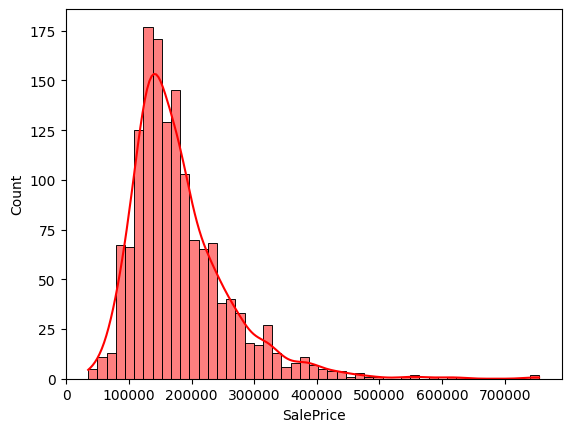

In [16]:
sns.histplot(data['SalePrice'],kde=True,color='red')
plt.show()

In [17]:
columns_to_standardize = ['TotalSquareFootage', 'TotalBedroomsBathrooms']
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [18]:
data['TotalBedroomsBathrooms'].head(7)


0    1.229331
1    0.507359
2    1.229331
3   -0.214614
4    1.951304
5   -0.936586
6    0.507359
Name: TotalBedroomsBathrooms, dtype: float64

In [19]:
data['TotalSquareFootage'].head(7)


0   -0.185013
1    0.055205
2    0.532854
3    0.059620
4    1.682835
5    0.961251
6    0.651569
Name: TotalSquareFootage, dtype: float64

In [20]:
x = data[['TotalSquareFootage', 'TotalBedroomsBathrooms']]
y = np.log1p(data['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [21]:
np.log1p(data['SalePrice'])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [23]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [24]:
mse_train = mean_squared_error(y_train , y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"The mean squared error on the training set : {mse_train}")
print(f"The mean squared error on the testing set : {mse_test}")


The mean squared error on the training set : 0.07652951886579225
The mean squared error on the testing set : 0.08521665578891377
